# Normal Distribution

# Contents

* [Introduction](#Introduction)
* [Bibliography](#Bibliography)

## Introduction

Normal distribution is also known as the Gaussian distribution. It was first discovered by Carl Friedrich Gauss, hence the name. (Chen 2022)

All distributions describe how the values of a variable are distributed.

Normal Distribution describes the distribution of values for many natural phenomena, for example height of adult males in Ireland, IQ scores, etc.

It is a very important probability distribution in statistics. It is a continuous probability distribution that is symmetrical around it's mean. When plotted on a graph it will give you what is commonly known as a __Bell Curve__ (Evans 2017)

Normal Distribution has the following propertise (CFI Team 2022):

* "It is symmeyrical", meaning it can be divided down the middle and each half would be equal.

* It's mean, mode and median are equal

* Empirical rule - The data in a Normally distributed dataset lies at a constant distance from the mean, for example approximately:
    * 68% of the data falls within one standard deviation of the mean
    * 95% of the data falls within two standard deviations of the mean
    * 99% of the data falls within three standard deviations of the mean
    
* Skewness, which measures the symmetry of a distribution in Normal Distribution is zero.
 
* Kurtosis, which measures the size of the 2 tails combined i Normal distribution is equal to 3. If Kurtosis is greater than 3 the dataset has heavier tails and if the kurtosis is less than 3 it's tails are lighter. Excess Kurtosis is calculated by subtracting the kurtosis from 3, thus giving the Normal Distribution an excess Kurtosis of zero.
 
 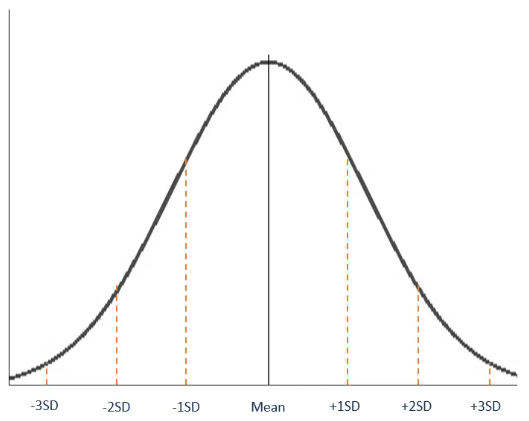
 <center>(CFI Team 2022)</center>

Links to use:

https://onlinestatbook.com/2/normal_distribution/normal_distribution.html

https://www.middlesex.mass.edu/ace/downloads/tipsheets/normal_cf.pdf

https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics#:~:text=So%2C%20a%20normal%20distribution%20will,of%20probability%20in%20the%20tails.

https://www.kaggle.com/code/gadaadhaarigeek/normal-distribution


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [3]:
# Normally distributed data from Kaggle
# Ref: https://www.kaggle.com/datasets/tinasoni/normal-distribution-data/discussion?resource=download&select=CompanyABCProfit.csv

df = pd.read_csv('data/CompanyABCProfit.csv')
df

,Year,Profit
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


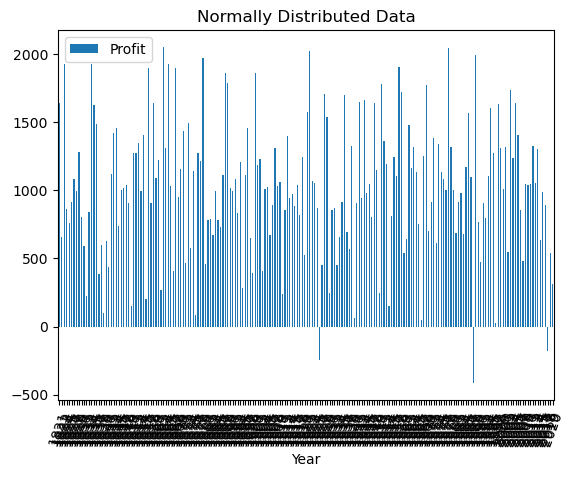

In [4]:
df.plot.bar(x="Year", y="Profit", rot=70, title="Normally Distributed Data");

In [10]:
xCol = df.index

In [13]:

df.plot.line(x='index', y="Profit", rot=70, title="Normally Distributed Data")

KeyError: 'index'

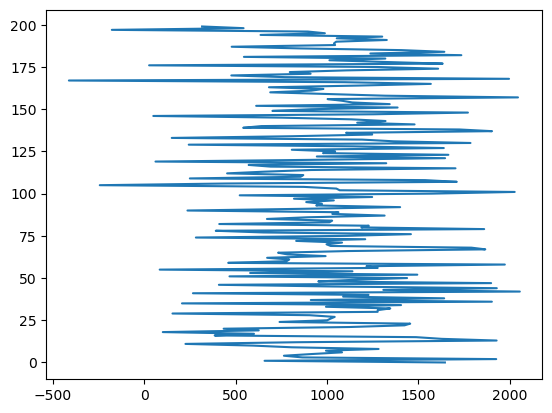

In [15]:
x = df.index
y = df.iloc[:, 1]

plt.plot(x, y)
plt.show()

In [16]:
# Put data into bins
# Ref; https://www.statology.org/data-binning-in-python/

df['bins'] = pd.qcut(df['Profit'], q=10)
df

,Year,Profit,bins
0,1821,1645,"(1405.4, 1667.9]"
1,1822,658,"(639.2, 806.7]"
2,1823,1926,"(1667.9, 2055.0]"
3,1824,865,"(806.7, 914.0]"
4,1825,764,"(639.2, 806.7]"
...,...,...,...
195,2016,988,"(914.0, 1024.0]"
196,2017,895,"(806.7, 914.0]"
197,2018,-178,"(-413.001, 406.3]"
198,2019,543,"(406.3, 639.2]"


In [24]:
bins = df['bins'].value_counts()
bins

(806.7, 914.0]       21
(-413.001, 406.3]    20
(406.3, 639.2]       20
(639.2, 806.7]       20
(1024.0, 1108.6]     20
(1108.6, 1259.6]     20
(1259.6, 1405.4]     20
(1405.4, 1667.9]     20
(1667.9, 2055.0]     20
(914.0, 1024.0]      19
Name: bins, dtype: int64

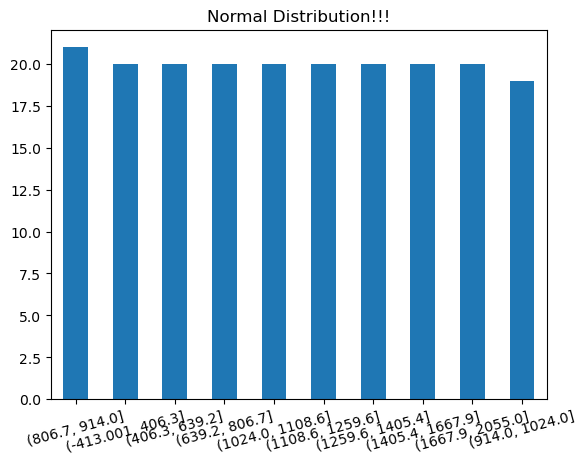

In [25]:

bins.plot.bar(rot=15, title="Normal Distribution!!!");


# Bibliography

[Back To Top](#Contents)

CFI Team, (2022). Normal Distribution: Also known as Gaussian or Gauss distribution. Available at: https://corporatefinanceinstitute.com/resources/data-science/normal-distribution/ (Accessed: 08/12/2022)

Chen, J, (2022). Normal Distribution: What It Is, Properties, Uses, and Formula. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp (Accessed: 15 November 2022)

Evans. J.R, (2017). Business Analytics. 2nd Ed. Harlow Essex: Pearson